# Load Data

We will use the [suicide rates](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016) dataset for try different data visualizations using [matplotlib](https://matplotlib.org)

In [1]:
import pandas as pd
suicide = pd.read_csv('Suicide.csv')
suicide.columns = ['country', 'year', 'sex', 'age', 'population', 'gdp', 'generation', 'suicide_rate']

In [2]:
suicide.sample(10)

,country,year,sex,age,population,gdp,generation,suicide_rate
10581,Grenada,2006,male,15-24 years,12437,7423,Millenials,0.00
23314,South Africa,1998,male,35-54 years,4251380,3512,Boomers,0.99
24590,Sweden,2005,female,35-54 years,1198561,45563,Boomers,11.26
9366,France,2008,female,75+ years,3430254,49901,Silent,13.44
12404,Ireland,2014,male,35-54 years,675986,59634,Generation X,24.41
24129,Suriname,1995,male,75+ years,2953,1782,G.I. Generation,33.86
16193,Mauritius,1985,male,75+ years,4400,1223,G.I. Generation,0.00
6104,Costa Rica,1993,male,75+ years,21300,3342,G.I. Generation,37.56
26941,United States,1992,female,15-24 years,17668700,27760,Generation X,3.67
18476,Panama,2008,female,25-34 years,280340,7972,Generation X,1.78


Let's set some interesting groups

In [3]:
young = suicide[suicide.age=='15-24 years']
middle = suicide[suicide.age=='35-54 years']
old = suicide[suicide.age=='75+ years']

male = young[young.sex=='male']
female = young[young.sex=='female']

usa = young[young.country=='United States']

import the matplotlib package for plotting

In [4]:
import matplotlib.pyplot as plt

To make sure plots are presented in the notebook we have to run the following "magic" command

In [5]:
%matplotlib inline

Let's start by exploring the USA GDP by year

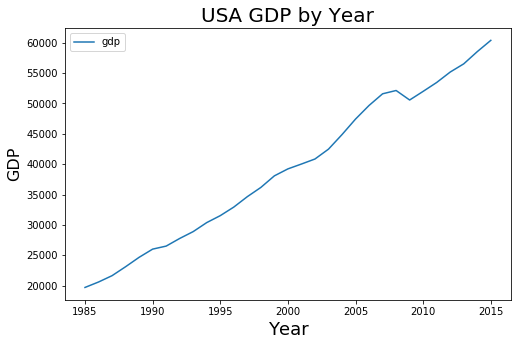

In [6]:
fig = plt.figure(figsize=(8, 5))
ax = plt.subplot(111)

usa.plot(x='year', y='gdp', ax=ax)

plt.title('USA GDP by Year', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('GDP', fontsize=16);

We can also use a scatter plot for it and choose the color

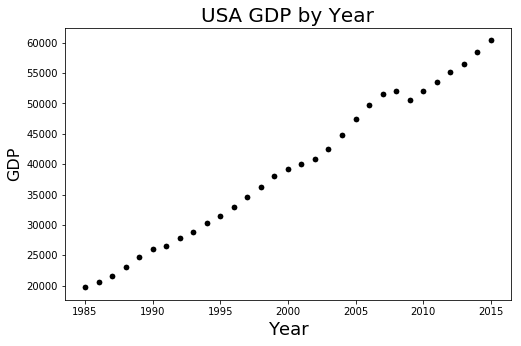

In [7]:
fig = plt.figure(figsize=(8, 5))
ax = plt.subplot(111)

usa.plot.scatter(x='year', y='gdp', color='black', ax=ax)

plt.title('USA GDP by Year', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('GDP', fontsize=16);

Let's not see the relationship between gdp and suicide rates

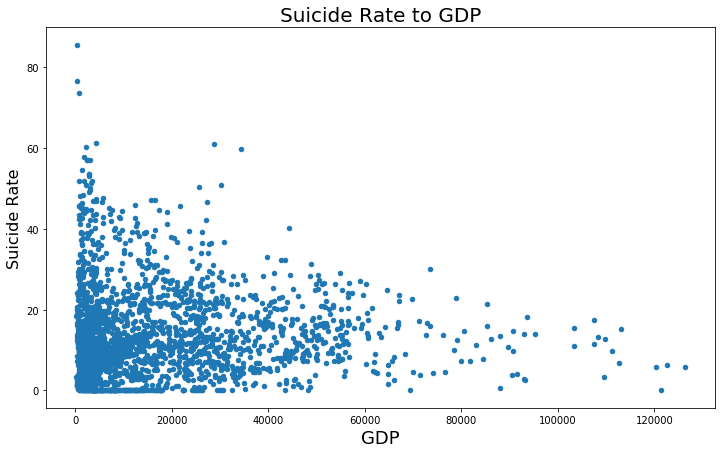

In [8]:
fig = plt.figure(figsize=(12, 7))
ax = plt.subplot(111)

male.plot.scatter(x='gdp', y='suicide_rate', ax=ax)

plt.title('Suicide Rate to GDP', fontsize=20)
plt.xlabel('GDP', fontsize=18)
plt.ylabel('Suicide Rate', fontsize=16);

Now let's check the yearly male suicide rate in the usa

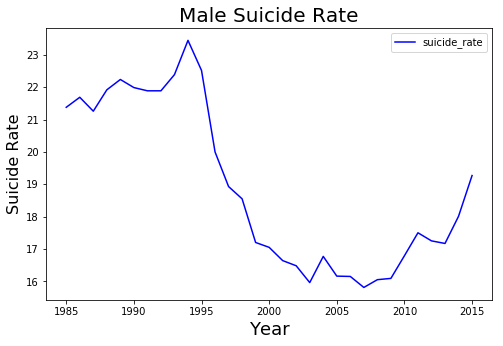

In [9]:
fig = plt.figure(figsize=(8, 5))
ax = plt.subplot(111)

usa_male = usa[usa.sex=='male']
usa_male.plot(x='year', y='suicide_rate', color='blue', ax=ax)

plt.title('Male Suicide Rate', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Suicide Rate', fontsize=16);

We can also compare it to the female suicide rates and show both in the same plot

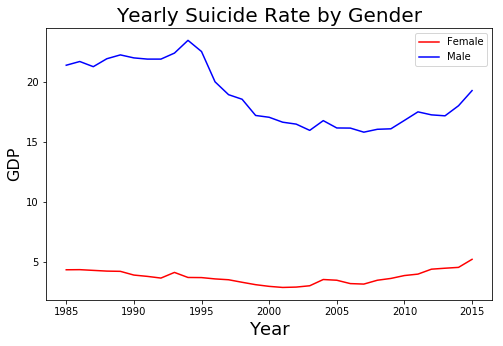

In [10]:
fig = plt.figure(figsize=(8, 5))
ax = plt.subplot(111)

usa_male = usa[usa.sex=='male']
usa_female = usa[usa.sex=='female']
usa_female.plot(x='year', y='suicide_rate', color='red', label='Female', ax=ax)
usa_male.plot(x='year', y='suicide_rate', color='blue', label='Male', ax=ax)

plt.title('Yearly Suicide Rate by Gender', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('GDP', fontsize=16);

Let us now see a comparision of the suicide rates amount young males in 2015 by country, here we can use a bar plot

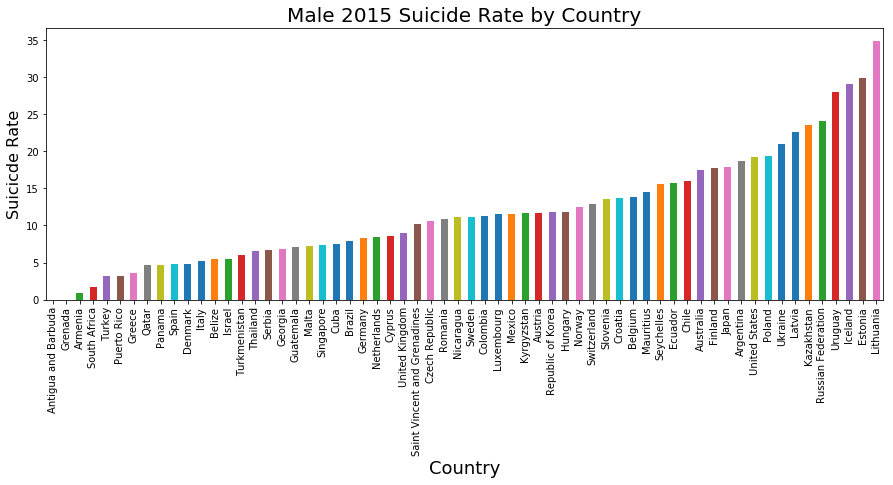

In [11]:
fig = plt.figure(figsize=(15, 5))
ax = plt.subplot(111)

males_2015 = young[(young.year==2015) & (young.sex=='male')]
males_2015.sort_values('suicide_rate').plot.bar(x='country', y='suicide_rate', ax=ax)

plt.title('Male 2015 Suicide Rate by Country', fontsize=20)
plt.xlabel('Country', fontsize=18)
plt.ylabel('Suicicde Rate', fontsize=16);
ax.legend().remove()

We can also use a horizontal bar plot for that

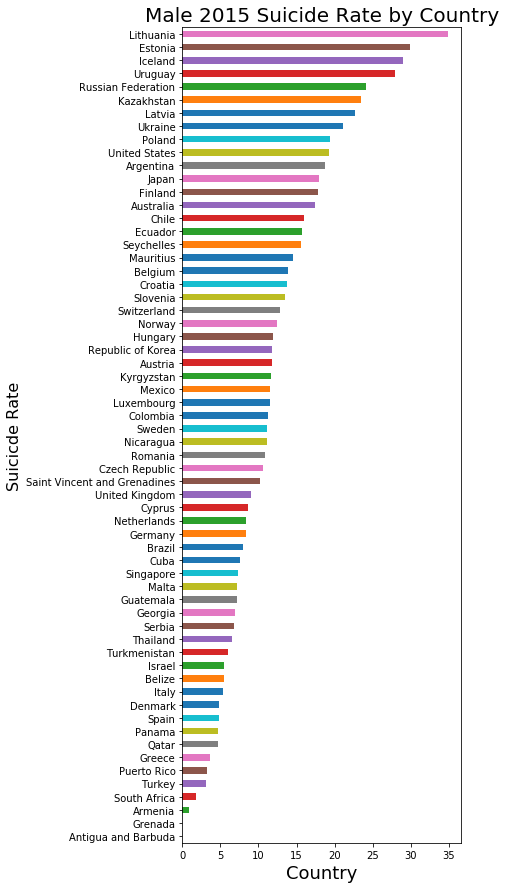

In [12]:
fig = plt.figure(figsize=(5, 15))
ax = plt.subplot(111)

males_2015 = young[(young.year==2015) & (young.sex=='male')]
males_2015.sort_values('suicide_rate').plot.barh(x='country', y='suicide_rate', ax=ax)

plt.title('Male 2015 Suicide Rate by Country', fontsize=20)
plt.xlabel('Country', fontsize=18)
plt.ylabel('Suicicde Rate', fontsize=16);
ax.legend().remove()

Now, we'd like to check the histogram of suicide rates among young male

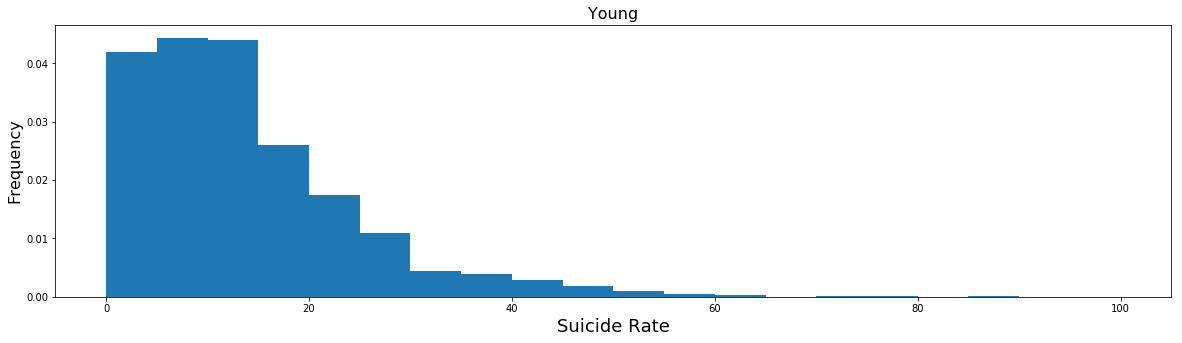

In [13]:
fig = plt.figure(figsize=(20, 5))
ax = plt.subplot(111)

bins = list(range(0, 105, 5))
young_male = young[young.sex=='male']

young_male.suicide_rate.plot.hist(bins=bins, density=True, ax=ax)
ax.set_xlabel('Suicide Rate', fontsize=18)
ax.set_ylabel('Frequency', fontsize=16);
ax.set_title('Young', fontsize=16);

We can also compare multiple plots showing them side by side

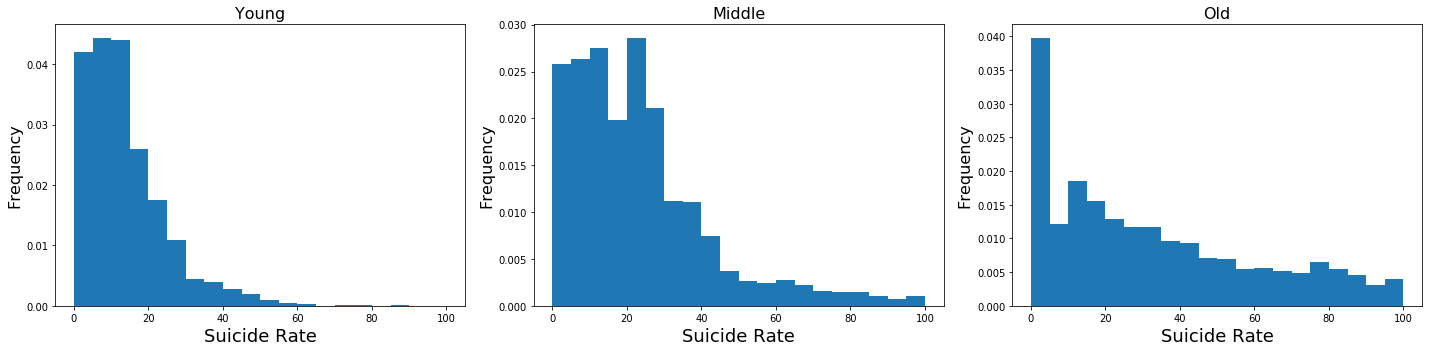

In [14]:
fig = plt.figure(figsize=(20, 5))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

bins = list(range(0, 105, 5))
young_male = young[young.sex=='male']
middle_male = middle[middle.sex=='male']
old_male = old[old.sex=='male']

young_male.suicide_rate.plot.hist(bins=bins, density=True, ax=ax1)
ax1.set_xlabel('Suicide Rate', fontsize=18)
ax1.set_ylabel('Frequency', fontsize=16);
ax1.set_title('Young', fontsize=16);

middle_male.suicide_rate.plot.hist(bins=bins, density=True, ax=ax2)
ax2.set_xlabel('Suicide Rate', fontsize=18)
ax2.set_ylabel('Frequency', fontsize=16);
ax2.set_title('Middle', fontsize=16);

old_male.suicide_rate.plot.hist(bins=bins, density=True, ax=ax3)
ax3.set_xlabel('Suicide Rate', fontsize=18)
ax3.set_ylabel('Frequency', fontsize=16);
ax3.set_title('Old', fontsize=16);
plt.tight_layout()

Or in whatever order and structure we like

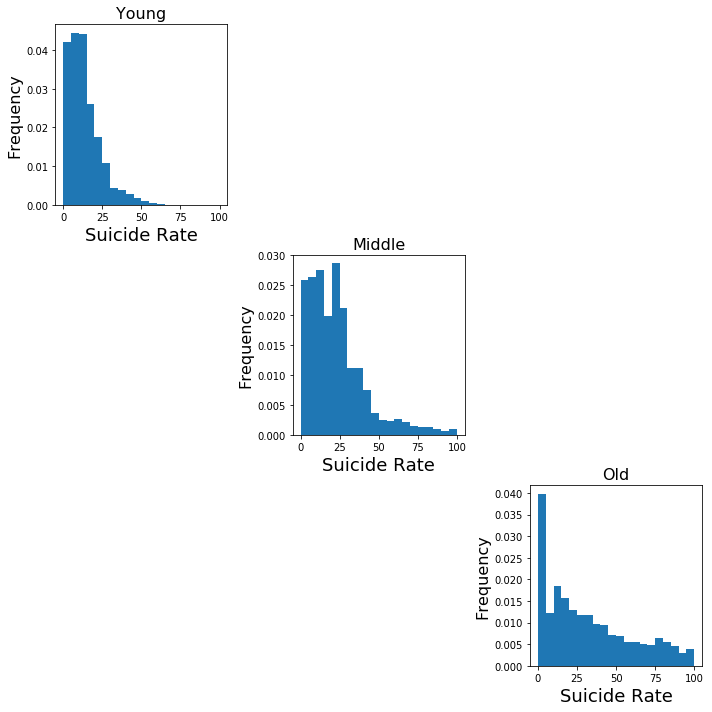

In [15]:
fig = plt.figure(figsize=(10, 10))
ax1 = plt.subplot(331)
ax2 = plt.subplot(335)
ax3 = plt.subplot(339)

bins = list(range(0, 105, 5))
young_male = young[young.sex=='male']
middle_male = middle[middle.sex=='male']
old_male = old[old.sex=='male']

young_male.suicide_rate.plot.hist(bins=bins, density=True, ax=ax1)
ax1.set_xlabel('Suicide Rate', fontsize=18)
ax1.set_ylabel('Frequency', fontsize=16);
ax1.set_title('Young', fontsize=16);

middle_male.suicide_rate.plot.hist(bins=bins, density=True, ax=ax2)
ax2.set_xlabel('Suicide Rate', fontsize=18)
ax2.set_ylabel('Frequency', fontsize=16);
ax2.set_title('Middle', fontsize=16);

old_male.suicide_rate.plot.hist(bins=bins, density=True, ax=ax3)
ax3.set_xlabel('Suicide Rate', fontsize=18)
ax3.set_ylabel('Frequency', fontsize=16);
ax3.set_title('Old', fontsize=16);
plt.tight_layout()

We can even place all of them in one plot

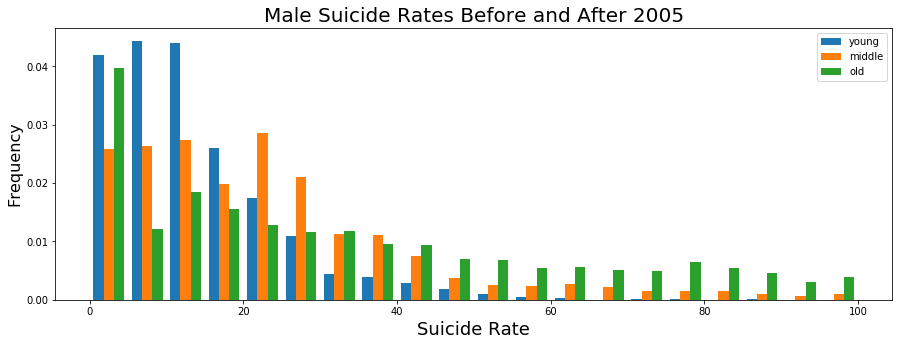

In [16]:
fig = plt.figure(figsize=(15, 5))
ax = plt.subplot(111)

series = [young_male.suicide_rate, middle_male.suicide_rate, old_male.suicide_rate]
plt.hist(series, bins, label=['young', 'middle', 'old'], density=True)
plt.title('Male Suicide Rates Before and After 2005', fontsize=20)
plt.xlabel('Suicide Rate', fontsize=18)
plt.ylabel('Frequency', fontsize=16);
plt.legend();

Finally, let's pick some interesting countries and compare their yearly suicide rates

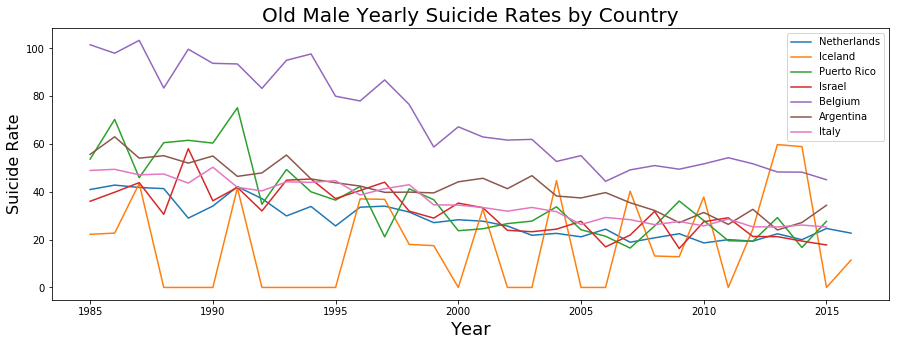

In [17]:
countries = ['Netherlands', 'Iceland', 'Puerto Rico', 'Israel', 'Belgium', 'Argentina', 'Italy']
suicide_countries = old[(old.country.isin(countries)) & (old.sex=='male')]

fig = plt.figure(figsize=(15, 5))
ax = plt.subplot(111)

for country in countries:
    country_data = suicide_countries[suicide_countries.country==country]
    country_data.plot(x='year', y='suicide_rate', label=country, ax=ax)
    
plt.title('Old Male Yearly Suicide Rates by Country', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Suicide Rate', fontsize=16);
plt.legend();